In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [3]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']


In [4]:
def scale(arr, mode=0):
    """scale array by max"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]


In [5]:
# get the name of all opsim dbs 
import os
import glob

dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases
os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns/timeGaps'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [6]:
dblist_all

['agnddf_v1.5_10yrs.db',
 'alt_dust_v1.5_10yrs.db',
 'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db',
 'baseline_2snaps_v1.5_10yrs.db',
 'baseline_v1.5_10yrs.db',
 'bulges_bs_v1.5_10yrs.db',
 'bulges_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_bs_v1.5_10yrs.db',
 'bulges_cadence_bulge_wfd_v1.5_10yrs.db',
 'bulges_cadence_i_heavy_v1.5_10yrs.db',
 'bulges_i_heavy_v1.5_10yrs.db',
 'daily_ddf_v1.5_10yrs.db',
 'dcr_nham1_ug_v1.5_10yrs.db',
 'dcr_nham1_ugr_v1.5_10yrs.db',
 'dcr_nham1_ugri_v1.5_10yrs.db',
 'dcr_nham2_ug_v1.5_10yrs.db',
 'dcr_nham2_ugr_v1.5_10yrs.db',
 'dcr_nham2_ugri_v1.5_10yrs.db',
 'descddf_v1.5_10yrs.db',
 'filterdist_indx1_v1.5_10yrs.db',
 'filterdist_indx2_v1.5_10yrs.db',
 'filterdist_indx3_v1.5_10yrs.db',
 'filterdist_indx4_v1.5_10yrs.db',
 'filterdist_indx5_v1.5_10yrs.db',
 'filterdist_indx6_v1.5_10yrs.db',
 'filterdist_indx7_v1.5_10yrs.db',
 'filterdist_indx8_v1.5_10yrs.db',
 'footprint_add_mag_cloudsv1.5_10yrs.db',
 'footprint_big_sky_dustv1.5_10yrs.db',
 'footprint_big_s

In [7]:
ls 

dT_skymap.ipynb              opsim_footprint.ipynb
dT_skymap_all.ipynb          plot_barh.ipynb
data/                        plot_fig34.ipynb
depth_wfd.ipynb              plot_footprint.ipynb
df_Nfields_GP.csv            plot_minisurveyFoM.ipynb
df_Nfields_LMC.csv           plot_radar-Copy1.ipynb
df_Nfields_SMC.csv           plot_radar.ipynb
df_Nstar_GP.csv              starDens16.npz
df_Nstar_LMC.csv             test/
df_Nstar_SMC.csv             tgaps_FoM_baseline_v1.5_GP.csv
df_tgapsFoM_GP.csv           tgaps_FoM_baseline_v1.5_LMC.csv
df_tgapsFoM_LMC.csv          tgaps_FoM_baseline_v1.5_SMC.csv
df_tgapsFoM_SMC.csv          tgaps_minisurvey-GP.ipynb
filterPairTGapsMetric.ipynb  tgaps_minisurvey.ipynb
footprintFoM.ipynb           tgaps_wfd_noddf.ipynb
minisurvey_footprint.ipynb


In [8]:
# df_fom = pd.read_csv('df_Nstar_wfd.csv') 
fomcsv = 'df_tgapsFoM_GP.csv' # for galFOM
#fomcsv = 'Nfields_v1.5.csv' # for exgalFOM
fomcsv = './data/tgapsFoM_v1.5.csv' # for tgaps
df_fom = pd.read_csv(fomcsv)
#df_fom['db'] = dblist_all

df_fom.head()

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,db
0,10773.203215,8211.584577,17053.204722,5794.473981,NaN,6.743981,20040.485143,23046.227400,7232.683657,666.870561,...,32424.668130,4930.500669,847.789379,72812.958177,31460.153334,13141.707376,75792.932493,39081.724304,70556.829527,agnddf_v1.5_10yrs.db
1,12341.104839,10034.017207,18406.773689,6662.479995,NaN,1.255707,24332.448925,25704.484239,11156.369018,1262.533511,...,38470.818571,8306.540787,2113.554299,70147.505656,37904.224858,21952.694156,67149.879473,50707.074846,47672.487777,alt_dust_v1.5_10yrs.db
2,12946.487613,12122.253436,19333.891292,6643.910044,NaN,1.680488,25198.530019,27676.867361,12179.515252,1191.365293,...,48244.921803,11393.436117,3322.109223,77038.155004,41835.022812,25221.377186,77951.494341,55995.778793,51681.402898,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
3,12316.289497,7215.969192,14165.567066,4523.946055,NaN,0.369482,22573.222853,21549.385923,6668.007481,603.249024,...,28973.545276,4673.657595,1069.298398,66506.124749,30875.305589,14568.925900,68737.458953,39682.776446,60924.566688,baseline_2snaps_v1.5_10yrs.db
4,11160.552213,8527.314295,16764.323853,5654.886869,NaN,0.114204,26282.772876,24221.060560,7729.310184,637.023803,...,32059.835876,5818.518207,1367.111606,59167.427039,33271.965745,17713.650884,58530.875903,43833.804014,67945.187363,baseline_v1.5_10yrs.db


In [41]:
#df_fom = df_fom.drop(31)

In [9]:
if 'db' not in df_fom.columns:
    df_fom['db'] = dblist_all

In [10]:
# scale fom table to 0 and 1
df_new = df_fom[ ['db'] ].copy()
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_new[col] = scale(df_fom[col]) 
    
df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs.db", "") )
df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs.db", "") )

df_new['family'] = df_new.apply(get_family, axis=1)


In [44]:
df_new.head()

,db,uu,ug,ur,ui,uz,uy,gg,gr,gi,...,ri,rz,ry,ii,iz,iy,zz,zy,yy,family
0,agnddf,0.173582,0.291681,0.415027,0.497021,NaN,NaN,0.199693,0.455509,0.222346,...,0.485530,0.339672,0.028894,0.024169,0.480144,0.560084,0.029233,0.418962,0.200445,agnddf
1,alt_dust,0.133049,0.207729,0.284657,0.303783,NaN,0.007443,0.169812,0.295164,0.165389,...,0.309853,0.199049,0.107313,0.018790,0.339264,0.409925,0.016335,0.302469,0.115197,alt
2,alt_roll_mod2_dust_sdf_0.20,0.188363,0.210431,0.271882,0.227365,NaN,0.020756,0.197774,0.295192,0.201436,...,0.410817,0.733902,0.239704,0.021679,0.370285,0.414261,0.014697,0.333694,0.096622,alt
3,baseline_2snaps,0.205402,0.296920,0.400576,0.487409,NaN,0.030659,0.227063,0.429222,0.142573,...,0.456530,0.317402,0.140900,0.037725,0.482125,0.526266,0.036561,0.438776,0.178566,baseline
4,baseline,0.142519,0.298239,0.450720,0.533921,NaN,NaN,0.200716,0.474091,0.198370,...,0.487940,0.347187,0.037886,0.032741,0.493979,0.601540,0.029159,0.458573,0.141030,baseline


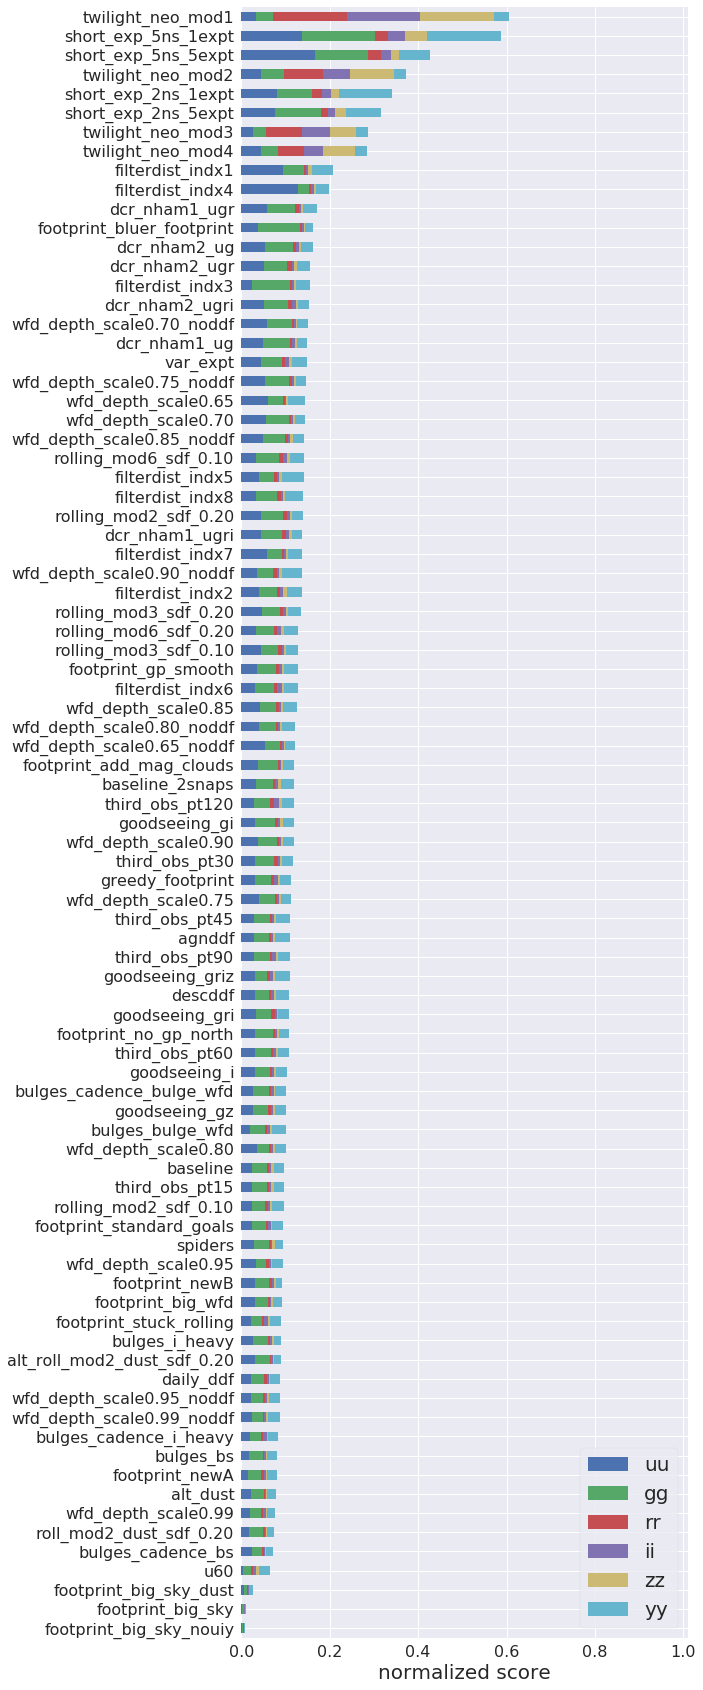

In [45]:
plot_barh(df_new, colon=cols_same, byfamily=False) 

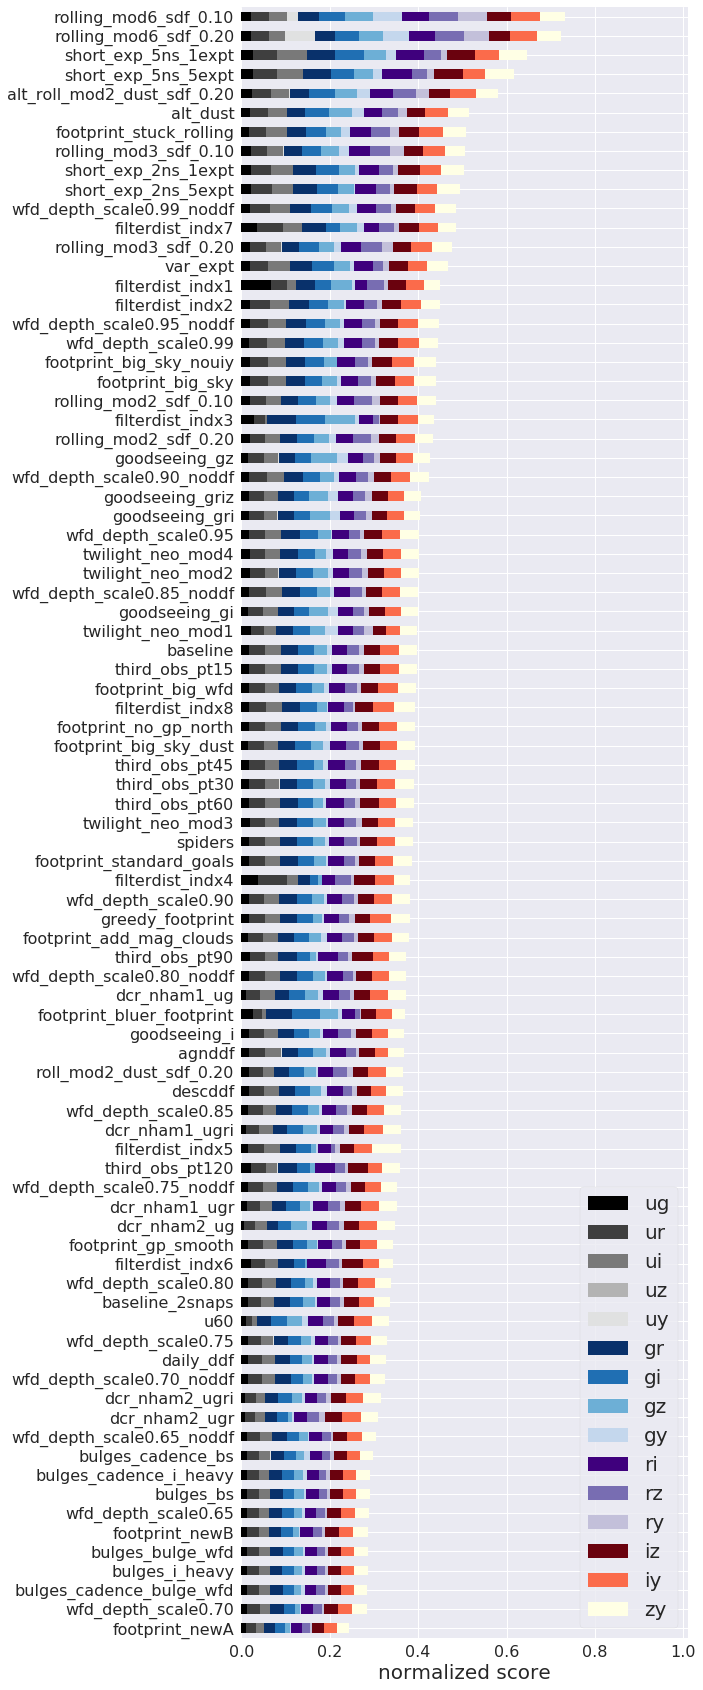

In [18]:
plot_barh(df_new, colon=cols_diff, byfamily=False, savefig='test.pdf', colormap=get_cmap() ) 

In [17]:
def plot_barh(df_new, colon, byfamily=True, savefig=None, **kwargs):
    """barh plot of FoM"""

    df_ = df_new.copy()
    df_['total'] = np.sum(df_[ colon ], axis=1)
    
    # get the max FOM of each family and sort by this
    df_mean_family = df_.groupby(by = "family", as_index=False).max()[['family', 'total']]
    df_ = df_.merge(df_mean_family, on='family', how='left', suffixes=['', '_fmean'],)
    
    df_ = df_.set_index('db')
    if byfamily:
        df_ = df_.sort_values(by=['total_fmean', 'total'], ascending=[True, True])
    else:
        # sort by total only
        df_ = df_.sort_values(by='total', ascending=True)
    
    df_[colon] = df_[colon]/len(colon)
    ax = df_[ colon ].plot.barh(stacked=True, figsize=(8, 30), **kwargs)
    
    # get positions of hlines
    if byfamily:
        hlines = df_.groupby(by='family', as_index=False, sort=False).count().cumsum()['total_fmean'].values - 0.5
        hlines = [hlines, hlines]
        ax.plot((-0.5, 1), hlines, 'k-', linewidth=1, alpha=0.5)
    
    plt.xlabel('normalized score', fontsize=20)
    plt.ylabel('')
    plt.legend(loc='lower right', frameon=True)
    plt.xlim([0,1.01])
    
    if savefig!=None:
        plt.savefig(savefig, bbox_inches='tight')
  

In [14]:
def get_cmap():
    import numpy as np
    import matplotlib.colors as mcolors
    
    data = np.vstack([np.arange(15) * 2 - 1, 
                          np.arange(15) * 2 - 1])
    
    # sample the colormaps that you want to use. Use 128 from each so we get 256
    # colors in total
    colors1 = plt.cm.Greys(np.linspace(0, 1, 6)[::-1])
    colors2 = plt.cm.Blues(np.linspace(0., 1, 5)[::-1])
    colors3 = plt.cm.Purples(np.linspace(0, 1, 4)[::-1])
    colors4 = plt.cm.Reds(np.linspace(0, 1, 3)[::-1])
    colors5 = plt.cm.YlGn(np.linspace(0, 1, 2))
    
    # combine them and build a new colormap
    colors = np.vstack((colors1[:-1], colors2[:-1],
                        colors3[:-1], colors4[:-1], colors5[:-1]))
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
    
    #plt.pcolor(data, cmap=mymap)
    #plt.colorbar()
    #plt.show()
    return mymap